In [97]:
# Import necessary libraries and dependencies
import pandas as pd
from pathlib import Path
import hvplot.pandas
import seaborn as sns
from Calculation.Calculator import Calculator
from re import search
import plotly.graph_objects as go
import plotly.express as px
from Rcalc.cal import GETPLAYER,AVGSTAT,ADDPOINTS,CURRENTSTAT


ModuleNotFoundError: No module named 'Calculation.Calculator'

In [92]:
# # Using the read_csv function and Path module, create a DataFrame by importing the draft-data-20-years.csv file
draft_df = pd.read_csv(Path('./draft-data-20-years-pos.csv'),
                       skiprows=1,
                       index_col = 'DraftYear', 
                       parse_dates=False, 
                       infer_datetime_format=True
)




#-------------------------------------------------------------------------------- 

#Imported old csv to merge into new csv 


CW = pd.read_csv(Path('./contractWorth.csv'),
                     
               
                       parse_dates=False, 
                       infer_datetime_format=True)

#-------------------------------------------------------------------------------- 
#Filtering through draft year for last 5 years

CW_Df = CW.loc[CW['DraftYr'] >= 2017]

#Filtering through Rank for only 1 round pick

CW_Df = CW_Df.loc[CW_Df['Rk']< 31]

#-------------------------------------------------------------------------------- 


# Dataframe of the specific row we wanted 

_CW_ = CW_Df[['Contract Worth','Player']]

 
    
    

    
    
    
    
#-------------------------------------------------------------------------------- 




In [117]:
class R:
    def __init__(self, data):
        # Add the data to class attributes, make all NaN values 0
        self.data = data.fillna(0)
        self.new_data = self.create_df()
        self.total_list = []
        self.PG = self.create_df()
        self.SG = self.create_df()
        self.SF = self.create_df()
        self.PGL = self.create_df()
        # self.table = self.table()
        # self.total  = self.get_total()
    def create_df(self):
        # Create an empty dataframe
        new_df = pd.DataFrame()

        # Make columns and add the Player and Contract Worth information
        new_df["Player"] = self.data.loc[:, "Player"]
        new_df["Contract Worth"] = self.data.loc[:, "Contract Worth"]
        new_df["Pos"] = self.data.loc[:, "Pos"]

        # Return the new dataframe
        return new_df
        
    def get_points(self, section):

        # Get the 25 percentile
        q1 = self.data[section].quantile(0.25)

        # Get the 75 percentile
        q2 = self.data[section].quantile(0.75)

        # Compare all players on the column chosen
        for row in self.data.loc[:, ["Player", section]].iterrows():

            # If the stat does not exist
            if row[1][section] == 0:
                # Replace value with point of 0
                self.data.loc[self.data["Player"] == row[1]["Player"], section] = 0

            # If in the higher percentile
            elif row[1][section] > q2:
                # Replace value with point of 3
                self.data.loc[self.data["Player"] == row[1]["Player"], section] = 3

            # If in the average percentile
            elif q1 <= row[1][section] <= q2:
                # Replace value with point of 2
                self.data.loc[self.data["Player"] == row[1]["Player"], section] = 2

            # If in the lower percentile
            elif row[1][section] < q1:
                # Replace value with point of 2
                self.data.loc[self.data["Player"] == row[1]["Player"], section] = 1

        # Add the section into the new_data
        self.new_data[section] = self.data[section]

        # Add the section name to the total_list
        
        self.total_list.append(section)
        
        return  self.new_data
    
    def AVGSTAT(self,section):
        MIN = 'min'
        
        
        
        
        for row in self.data.loc[:, ["Player", section,'Pos']].iterrows():
            if row[1]['Pos'] == 'PG'or 'SG':
                q1 = PG_25_df[section].describe()
        
                q1R =q1[MIN]
        
                q2 = PG_75_df[section].describe()
        
                q2R = q2[MIN]
            
                 
                
                
                # If the stat does not exist
                if row[1][section] == 0:
                    # Replace value with point of 0
                    self.data.loc[self.data["Player"] == row[1]["Player"], section] = 0
                    x = 0

                elif row[1][section] > q1R:
                    # Replace value with point of 3
                    self.data.loc[self.data["Player"] == row[1]["Player"], section] = 3
                    x = 3

                 # If in the average percentile
                elif q1R <= row[1][section] <= q2R:
                    # Replace value with point of 2
                    self.data.loc[self.data["Player"] == row[1]["Player"], section] = 2
                    x = 2

                # If in the lower percentile
                elif row[1][section] < q2R:
                    # Replace value with point of 2
                    self.data.loc[self.data["Player"] == row[1]["Player"], section] = 1
                    x = 1
                    
            if row[1]['Pos'] == 'C' or 'F/C':
                
                q1 = C_25_df[section].describe()
        
                q1R =q1[MIN]
        
                q2 = C_75_df[section].describe()
        
                q2R = q2[MIN]
            
                 
                
                
                # If the stat does not exist
                if row[1][section] == 0:
                    # Replace value with point of 0
                    self.data.loc[self.data["Player"] == row[1]["Player"], section] = 0
                    x = 0

                elif row[1][section] > q1R:
                    # Replace value with point of 3
                    self.data.loc[self.data["Player"] == row[1]["Player"], section] = 3
                    x = 3

                 # If in the average percentile
                elif q1R <= row[1][section] <= q2R:
                    # Replace value with point of 2
                    self.data.loc[self.data["Player"] == row[1]["Player"], section] = 2
                    x = 2

                # If in the lower percentile
                elif row[1][section] < q2R:
                    # Replace value with point of 2
                    self.data.loc[self.data["Player"] == row[1]["Player"], section] = 1
                    x = 1
            
            if row[1]['Pos'] == 'SF':
                q1 = SF_25_df[section].describe()
        
                q1R =q1[MIN]
        
                q2 = SF_75_df[section].describe()
        
                q2R = q2[MIN]
            
                 
                
                
                # If the stat does not exist
                if row[1][section] == 0:
                    # Replace value with point of 0
                    self.data.loc[self.data["Player"] == row[1]["Player"], section] = 0
                    x = 0

                elif row[1][section] > q1R:
                    # Replace value with point of 3
                    self.data.loc[self.data["Player"] == row[1]["Player"], section] = 3
                    x = 3

                 # If in the average percentile
                elif q1R <= row[1][section] <= q2R:
                    # Replace value with point of 2
                    self.data.loc[self.data["Player"] == row[1]["Player"], section] = 2
                    x = 2

                # If in the lower percentile
                elif row[1][section] < q2R:
                    # Replace value with point of 2
                    self.data.loc[self.data["Player"] == row[1]["Player"], section] = 1
                    x = 1
            else:
                self.data.loc[self.data["Player"] == row[1]["Player"], section] 
                 
                
                    
                
                
                
                    


               
        self.new_data[section] = self.data[section]

        # Add the section name to the total_list
        
        self.total_list.append(section)
        
        return   self.new_data
    
    
    def get_total(self,):
        # Add columns together and create Total column
        self.new_data["Total"] = self.new_data[self.total_list].sum(axis = 1)
        
        return self.new_data.sort_values(by="Total",
            ascending=False)
        
        
        
    def get_groups(self):
        # Get the total amount of points
        self.get_total()
        
       

        # # Get the 25th and 75th percentile of the Total points
        # total_q1 = self.new_data["Total"].quantile(0.25)
        # total_q2 = self.new_data["Total"].quantile(0.75)

        # High dataframe where Players are above average
        
        
         
        searchfor = ['PG']
        self.PG = self.new_data.loc[self.new_data['Pos'].str.contains('|'.join(searchfor))].sort_values(by="Total",
            ascending=False)
        self.PG = self.PG.loc[self.PG['Total'] >=18].describe().round()
        min_val=self.PG['Contract Worth'][3]
        max_val=self.PG['Contract Worth'][7]
        mean_val=self.PG['Contract Worth'][1]
        self.PG = pd.DataFrame(data= {'min':[min_val], 'max':[max_val], 'mean':[mean_val]}, index=None)
    
        
        self.PGL = self.new_data.loc[self.new_data['Pos'].str.contains('|'.join(searchfor))].sort_values(by="Total",
            ascending=False)
        self.PGL = self.PGL.loc[self.PGL['Total'] <18].describe().round()
        min_val=self.PGL['Contract Worth'][3]
        max_val=self.PGL['Contract Worth'][7]
        mean_val=self.PGL['Contract Worth'][1]
        self.PGL = pd.DataFrame(data= {'min':[min_val], 'max':[max_val], 'mean':[mean_val]}, index=None)
        
        
        # self.new_data
        
        
       


#  .describe().round()

# test1.describe().round() 


        #     by="Contract Worth",
        #     ascending=False
        # )
        # Get only Players that have Contract Worth
#         self.PG["Contract Worth"] = self.PG["Contract Worth"].loc[self.PG["Contract Worth"] > 0]
        
#         self.PG = self.PG.dropna().sort_values(by="Total",
#             ascending=False)

        # Low dataframe where Players are below average
        
        
        
#         searchfor = ['SG']
#         self.SG = self.new_data.loc[self.new_data['Pos'].str.contains('|'.join(searchfor))].sort_values(by="Total",
#             ascending=False)
#         self.SG = self.SG.loc[self.SG['Total'] >=18].describe().round()
#         min_val=self.SG['Contract Worth'][3]
#         max_val=self.SG['Contract Worth'][7]
#         mean_val=self.SG['Contract Worth'][1]
#         self.SG = pd.DataFrame(data= {'min':[min_val], 'max':[max_val], 'mean':[mean_val]}, index=None)
        
#         self.SGL = self.new_data.loc[self.new_data['Pos'].str.contains('|'.join(searchfor))].sort_values(by="Total",
#             ascending=False)
#         self.SGL = self.SGL.loc[self.SGL['Total'] <18].describe().round()
#         min_val=self.SGL['Contract Worth'][3]
#         max_val=self.SGL['Contract Worth'][7]
#         mean_val=self.SGL['Contract Worth'][1]
#         self.SGL = pd.DataFrame(data= {'min':[min_val], 'max':[max_val], 'mean':[mean_val]}, index=None)
        
    
        
        
        
        
        
        
        
        # # Get only Players that have Contract Worth
        # self.SG["Contract Worth"] = self.SG["Contract Worth"].loc[self.SG["Contract Worth"] > 0]
        # self.SG = self.SG.dropna()

        # Mid dataframe where Players are average
        
        
#         searchfor = ['SF']
#         self.SF_ = self.new_data.loc[self.new_data['Pos'].str.contains('|'.join(searchfor))].sort_values(by="Total",
#             ascending=False)
#         self.SF = self.new_data.loc[self.new_data['Pos'].str.contains('|'.join(searchfor))].sort_values(by="Total",
#             ascending=False)
#         self.SF = self.SF.loc[self.SF['Total'] >18].describe().round()
#         min_val=self.SF['Contract Worth'][3]
#         max_val=self.SF['Contract Worth'][7]
#         mean_val=self.SF['Contract Worth'][1]
#         self.SF = pd.DataFrame(data= {'min':[min_val], 'max':[max_val], 'mean':[mean_val]}, index=None)
        
#         self.SFL = self.new_data.loc[self.new_data['Pos'].str.contains('|'.join(searchfor))].sort_values(by="Total",
#             ascending=False)
#         self.SFL = self.SFL.loc[self.SFL['Total'] <18].describe().round()
#         min_val=self.SFL['Contract Worth'][3]
#         max_val=self.SFL['Contract Worth'][7]
#         mean_val=self.SFL['Contract Worth'][1]
#         self.SFL = pd.DataFrame(data= {'min':[min_val], 'max':[max_val], 'mean':[mean_val]}, index=None)

#         # Get only Players that have Contract Worth
# #         self.SF["Contract Worth"] = self.SF["Contract Worth"].loc[self.SF["Contract Worth"] > 0]
# #         self.SF = self.SF.dropna()

#         searchfor = ['PF']
#         self.PF_ = self.new_data.loc[self.new_data['Pos'].str.contains('|'.join(searchfor))].sort_values(by="Total",
#             ascending=False)
#         self.PF = self.new_data.loc[self.new_data['Pos'].str.contains('|'.join(searchfor))].sort_values(by="Total",
#             ascending=False)
#         self.PF = self.PF.loc[self.PF['Total'] >18].describe().round()
#         min_val=self.PF['Contract Worth'][3]
#         max_val=self.PF['Contract Worth'][7]
#         mean_val=self.PF['Contract Worth'][1]
#         self.PF = pd.DataFrame(data= {'min':[min_val], 'max':[max_val], 'mean':[mean_val]}, index=None)
        
#         self.PFL = self.new_data.loc[self.new_data['Pos'].str.contains('|'.join(searchfor))].sort_values(by="Total",
#             ascending=False)
#         self.PFL = self.PFL.loc[self.PFL['Total'] <18].describe().round()
#         min_val=self.PFL['Contract Worth'][3]
#         max_val=self.PFL['Contract Worth'][7]
#         mean_val=self.PFL['Contract Worth'][1]
#         self.PFL = pd.DataFrame(data= {'min':[min_val], 'max':[max_val], 'mean':[mean_val]}, index=None)
     
                
#         searchfor = ['C', 'C/F']
#         self.C_ = self.new_data.loc[self.new_data['Pos'].str.contains('|'.join(searchfor))].sort_values(by="Total",
#             ascending=False)
#         self.PF = self.new_data.loc[self.new_data['Pos'].str.contains('|'.join(searchfor))].sort_values(by="Total",
#             ascending=False)
#         self.C_ = self.PF.loc[self.PF['Total'] >18].describe().round()
#         min_val=self.C_['Contract Worth'][3]
#         max_val=self.C_['Contract Worth'][7]
#         mean_val=self.C_['Contract Worth'][1]
#         self.C_ = pd.DataFrame(data= {'min':[min_val], 'max':[max_val], 'mean':[mean_val]}, index=None)
        
#         self.PFL = self.new_data.loc[self.new_data['Pos'].str.contains('|'.join(searchfor))].sort_values(by="Total",
#             ascending=False)
#         self.CL = self.PFL.loc[self.PFL['Total'] <18].describe().round()
#         min_val=self.CL['Contract Worth'][3]
#         max_val=self.CL['Contract Worth'][7]
#         mean_val=self.CL['Contract Worth'][1]
#         self.CL = pd.DataFrame(data= {'min':[min_val], 'max':[max_val], 'mean':[mean_val]}, index=None)        
                    
    def get(self):
        self.get_groups()
        # # Get the investment offer
        # investment = inv

        
        # Create ROI Column
        
        # self.PG["min"] = self.PG["min"]

        # For each row in our original data
        self.new_data['min'] = ""
        self.new_data['max'] = ""
        self.new_data['mean'] = ""
        
        for row in self.new_data.loc[:, ["Player","Total",'Pos']].iterrows():
            if row[1]['Total']== 18 and row[1]['Pos']:
                self.new_data.loc[self.new_data["Player"]== row[1]['Player'],'min'] = self.PG["min"][0]
                
                self.new_data.loc[self.new_data["Player"]== row[1]['Player'],'max'] = self.PG["max"][0]
                
                self.new_data.loc[self.new_data["Player"]== row[1]['Player'],'mean'] = self.PG["mean"][0]
                
                
                
            else:
                self.new_data.loc[self.new_data["Player"]== row[1]['Player'],'min'] =self.PGL["min"][0] 
                
                self.new_data.loc[self.new_data["Player"]== row[1]['Player'],'max'] = self.PGL["max"][0]
                
                self.new_data.loc[self.new_data["Player"]== row[1]['Player'],'mean'] = self.PGL["mean"][0]
             
        
        return self.new_data.sort_values(by="Total",
            ascending=False)
            
            
            
        
        
        
        
        
        
        
        
   
            
            
            
            
            # else:
            #     self.new_data['min'] = 0
                
            
                
        
               
            
            
           
#             

#               if row in self.new_data['Total']:
# #                 print(row)
          
                     
#                           self.new_data['min'] = self.PG["min"][0]
                            
                        
        
#                 self.new_data['min'] = self.PG["min"][0]
# #             for  self.new_data.loc['Total']
            
#                 return self.new_data
#         return self.new_data  
             
                    
                
                
            
            
          
            
#             if row == 18:
#                 self.new_data["min"] = self.PG["min"]
# #             else:
                
#                 self.new_data["min"] = self.new_data.loc[self.new_data["min"] == row[1]["min"]] = 0
            

          
        
        
        # Get the current contract price
            # current_value = (row[1]["Contract Worth"] * (10 ** (-6)))
            # # Calculate ROI
            # roi = ((current_value - investment) / investment)
            # # Calculate return on investment
            # self.data.loc[self.data["Player"] == row[1]["Player"], "ROI"] = (roi*inv)*(10**3)

        # # Add new column to the new data frame
        # self.new_data["min"] = self.PG["min"]
                    
            



In [118]:
p = R(PG_heavy_df)  
stats = ['FT%','FG%','APG','PPG','3P%']

for x in stats:
   
    p.AVGSTAT(x)


p.AVGSTAT('RPG')

p.get_total()

p.get_groups()

p.PG

display(p.get())

p.get().to_csv("2022_Players_Updated.csv")



,Player,Contract Worth,Pos,FT%,FG%,APG,PPG,3P%,RPG,Total,min,max,mean
DraftYr,,,,,,,,,,,,,
2019,Darius Garland,29083315.0,PG,3.0,3.0,3.0,3.0,3.0,3.0,18.0,7625397.0,45598818.0,23480321.0
2019,Coby White,24131515.0,PG,3.0,3.0,3.0,3.0,3.0,3.0,18.0,7625397.0,45598818.0,23480321.0
2021,Jalen Suggs,29956217.0,PG,3.0,3.0,3.0,3.0,3.0,3.0,18.0,7625397.0,45598818.0,23480321.0
2020,LaMelo Ball,35596275.0,PG,3.0,3.0,3.0,3.0,3.0,3.0,18.0,7625397.0,45598818.0,23480321.0
2021,Bones Hyland,10763119.0,PG,3.0,3.0,3.0,3.0,3.0,3.0,18.0,7625397.0,45598818.0,23480321.0
2020,Cole Anthony,15887971.0,PG,3.0,3.0,3.0,3.0,3.0,3.0,18.0,7625397.0,45598818.0,23480321.0
2020,Tyrese Maxey,12152560.0,PG,3.0,3.0,3.0,3.0,3.0,3.0,18.0,7625397.0,45598818.0,23480321.0
2020,Tyrese Haliburton,17878995.0,PG,3.0,3.0,3.0,3.0,3.0,3.0,18.0,7625397.0,45598818.0,23480321.0
2017,Derrick White,7625397.0,PG,3.0,3.0,3.0,3.0,3.0,3.0,18.0,7625397.0,45598818.0,23480321.0


In [102]:
_2022 = pd.read_csv(Path('./2022_top_30.csv'),
                       
                       index_col = 'Rk', 
                       parse_dates=False, 
                       infer_datetime_format=True)


_22 = R(_2022)

stats = ['FT%','FG%','APG','PPG','3P%']

for x in stats:
    _22.AVGSTAT(x)


_22.AVGSTAT('RPG')

_22.get_total()


# _22.PG




,Player,Contract Worth,Pos,FT%,FG%,APG,PPG,3P%,RPG,Total
Rk,,,,,,,,,,
1,Jabari Smith,0.0,PF,3.0,3.0,3.0,3.0,3.0,3.0,18.0
14,Ochai Agbaji,0.0,SG,3.0,3.0,3.0,3.0,3.0,3.0,18.0
26,Wendell Moore Jr,0.0,SG,3.0,3.0,3.0,3.0,3.0,3.0,18.0
25,Marjon Beauchamp,0.0,SF,3.0,3.0,3.0,3.0,3.0,3.0,18.0
24,E.J. Liddell,0.0,PF,3.0,3.0,3.0,3.0,3.0,3.0,18.0
23,Nikola Jovic,0.0,SG,3.0,3.0,3.0,3.0,3.0,3.0,18.0
22,Blake Wesley,0.0,SG,3.0,3.0,3.0,3.0,3.0,3.0,18.0
20,Kendall Brown,0.0,SF,3.0,3.0,3.0,3.0,3.0,3.0,18.0
19,Ousmane Dieng,0.0,SF,3.0,3.0,3.0,3.0,3.0,3.0,18.0


In [10]:


#-------------------------------------------------------------------------------- 


# seting idex to player and joining the old df to new df that match index player 

# old df also contains contract worth which we merge matching contract wortH TO PLAYER


newd = draft_df.set_index('Player').join(_CW_.set_index('Player'))
  

    
    
    #Filtering through draft year for last 5 years
newd__ = newd.loc[newd['DraftYr'] >= 2017]



#-------------------------------------------------------------------------------- 


draft_df= newd__ .reset_index()

# .set_index('DraftYr')

draft_df =  draft_df.set_index('DraftYr')




display(newd)

display(draft_df)

,Unnamed: 0,Rk,Pk,Tm,Pos,College,Yrs,G,TOTMP,TOTPTS,...,WS/48,BPM,VORP,DraftYr,MPG,PPG,RPG,APG,playerurl,Contract Worth
Player,,,,,,,,,,,,,,,,,,,,,
A.J. Bramlett,540,39,39,CLE,NaN,Arizona,1.0,8.0,61.0,8.0,...,-0.129,-15.9,-0.2,1999,7.6,1.0,2.8,0.0,https://www.sports-reference.com/cbb/players/a...,NaN
A.J. English,37,37,37,WAS,NaN,Virginia Union University,2.0,151.0,3108.0,1502.0,...,0.017,-3.9,-1.5,1990,20.6,9.9,2.1,2.1,https://www.sports-reference.com/cbb/players/a...,NaN
A.J. Guyton,591,32,32,CHI,NaN,Indiana,3.0,80.0,1246.0,442.0,...,0.010,-2.9,-0.3,2000,15.6,5.5,1.0,1.8,https://www.sports-reference.com/cbb/players/a...,NaN
A.J. Hammons,1554,46,46,DAL,NaN,Purdue,1.0,22.0,163.0,48.0,...,-0.001,-6.6,-0.2,2016,7.4,2.2,1.6,0.2,https://www.sports-reference.com/cbb/players/a...,NaN
A.J. Price,1140,52,52,IND,NaN,UConn,6.0,261.0,3929.0,1523.0,...,0.058,-1.3,0.7,2009,15.1,5.8,1.4,2.2,https://www.sports-reference.com/cbb/players/a...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
İlkan Karaman,1325,57,57,BRK,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN
İzzet Türkyılmaz,1318,50,50,DEN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN
Žan Tabak,105,51,51,HOU,NaN,NaN,6.0,247.0,3607.0,1233.0,...,0.032,-4.9,-2.7,1991,14.6,5.0,3.6,0.7,NaN,NaN


,Player,Unnamed: 0,Rk,Pk,Tm,Pos,College,Yrs,G,TOTMP,...,WS,WS/48,BPM,VORP,MPG,PPG,RPG,APG,playerurl,Contract Worth
DraftYr,,,,,,,,,,,,,,,,,,,,,
2018,Aaron Holiday,1651,23,23,IND,PG,UCLA,4.0,226.0,4142.0,...,4.1,0.047,-2.4,-0.4,18.3,7.4,1.7,2.3,https://www.sports-reference.com/cbb/players/a...,10477351.0
2020,Aaron Nesmith,1762,14,14,BOS,SF,Vanderbilt,2.0,87.0,1112.0,...,1.2,0.051,-4.2,-0.6,12.8,4.2,2.3,0.4,https://www.sports-reference.com/cbb/players/a...,16528217.0
2021,Aaron Wiggins,1863,55,55,OKC,SG,Maryland,1.0,34.0,762.0,...,1.2,0.077,-2.9,-0.2,22.4,7.1,3.4,1.1,https://www.sports-reference.com/cbb/players/a...,NaN
2019,Admiral Schofield,1730,42,42,PHI,SF,Tennessee,2.0,57.0,639.0,...,0.4,0.027,-5.1,-0.5,11.2,3.2,1.7,0.5,https://www.sports-reference.com/cbb/players/a...,NaN
2017,Alec Peters,1622,54,54,PHO,SF,Valparaiso,1.0,20.0,225.0,...,0.3,0.055,-2.8,0.0,11.3,4.1,1.9,0.6,https://www.sports-reference.com/cbb/players/a...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,Zach Collins,1578,10,10,SAC,C,Gonzaga,4.0,159.0,2773.0,...,4.0,0.069,-2.6,-0.4,17.4,5.7,4.0,0.9,https://www.sports-reference.com/cbb/players/z...,14724873.0
2020,Zeke Nnaji,1770,22,22,DEN,F/C,Arizona,2.0,81.0,1048.0,...,2.8,0.129,-1.8,0.1,12.9,5.0,2.6,0.3,https://www.sports-reference.com/cbb/players/z...,11802681.0
2018,Zhaire Smith,1644,16,16,PHO,SG,Texas Tech,2.0,13.0,143.0,...,0.0,0.011,-6.1,-0.1,11.0,3.7,1.2,0.9,https://www.sports-reference.com/cbb/players/z...,13791056.0


In [11]:
# Review the dataframe
draft_df.head()

,Player,Unnamed: 0,Rk,Pk,Tm,Pos,College,Yrs,G,TOTMP,...,WS,WS/48,BPM,VORP,MPG,PPG,RPG,APG,playerurl,Contract Worth
DraftYr,,,,,,,,,,,,,,,,,,,,,
2018,Aaron Holiday,1651,23,23,IND,PG,UCLA,4.0,226.0,4142.0,...,4.1,0.047,-2.4,-0.4,18.3,7.4,1.7,2.3,https://www.sports-reference.com/cbb/players/a...,10477351.0
2020,Aaron Nesmith,1762,14,14,BOS,SF,Vanderbilt,2.0,87.0,1112.0,...,1.2,0.051,-4.2,-0.6,12.8,4.2,2.3,0.4,https://www.sports-reference.com/cbb/players/a...,16528217.0
2021,Aaron Wiggins,1863,55,55,OKC,SG,Maryland,1.0,34.0,762.0,...,1.2,0.077,-2.9,-0.2,22.4,7.1,3.4,1.1,https://www.sports-reference.com/cbb/players/a...,NaN
2019,Admiral Schofield,1730,42,42,PHI,SF,Tennessee,2.0,57.0,639.0,...,0.4,0.027,-5.1,-0.5,11.2,3.2,1.7,0.5,https://www.sports-reference.com/cbb/players/a...,NaN
2017,Alec Peters,1622,54,54,PHO,SF,Valparaiso,1.0,20.0,225.0,...,0.3,0.055,-2.8,0.0,11.3,4.1,1.9,0.6,https://www.sports-reference.com/cbb/players/a...,NaN


In [12]:
# Selecting columns from the dataframe for analysis
draft_df = draft_df[['Pk','Tm','Player','College','MPG','PPG', 'RPG', 'APG','FG%', '3P%','FT%','Pos','Rk','Contract Worth']]

In [13]:
# Filter dataframe to get most recent 5 years data
last_5_yrs_draft_df = draft_df

last_5_yrs_draft_df =last_5_yrs_draft_df.sort_index()

In [ ]:
# Limit data on 1st round picks last 5 years
last_5_yrs_1_rnd_draft_df = last_5_yrs_draft_df.loc[last_5_yrs_draft_df['Pk'] <=30]








# weight PPG,APG,FT heaviest
PG_STATS_df = last_5_yrs_1_rnd_draft_df[['FG%','FT%','3P%','Pos','APG', 'PPG','Player','Rk','Contract Worth','RPG']]

# ------------------------------------------------------------------------------------------------------------------- 


searchfor = ['PG']
# s[s.str.contains('|'.join(searchfor))]



PG_heavy_df = PG_STATS_df.loc[PG_STATS_df['Pos'].str.contains('|'.join(searchfor))]



# ------------------------------------------------------------------------------------------------------------------- 

PG_25_df = PG_heavy_df.loc[PG_heavy_df['Rk'] <=8]

#Filtering out data 
PG_50 = PG_heavy_df.loc[PG_heavy_df['Rk'] >8]

PG_50_df = PG_50 .loc[PG_50 ['Rk'] <16]

PG_75_df = PG_50 .loc[PG_50 ['Rk'] >16]
# ------------------------------------------------------------------------------------------------------------------- 

# All STATS that are going to be used 


# PPG,APG,FT heaviest 
SG_STATS_df = last_5_yrs_1_rnd_draft_df[['FG%','FT%','3P%','Pos','APG', 'PPG','Player','Rk','Contract Worth','RPG']]


# PPG,RPG%,ASP%,
SF_STATS_df = last_5_yrs_1_rnd_draft_df[['FG%','FT%','3P%','Pos','APG', 'PPG','Player','Rk','Contract Worth','RPG']]


# PPG,RPG%,ASP%,
PF_STATS_df = last_5_yrs_1_rnd_draft_df[['FG%','FT%','3P%','Pos','APG', 'PPG','Player','Rk','Contract Worth','RPG']]


#PPG,RPG%,ASP%,
C_STATS_df = last_5_yrs_1_rnd_draft_df[['FG%','FT%','3P%','Pos','APG', 'PPG','Player','Rk','Contract Worth','RPG']]

# ------------------------------------------------------------------------------------------------------------------- 


# Visual 



_PG_ = PG_25_df[['Rk','Player','Contract Worth']],PG_50_df[['Rk','Player','Contract Worth']],PG_75_df[['Rk','Player','Contract Worth']].copy()
 




    
    
# display(_PG_[0:2])


RANGE_PG_25 = PG_25_df[['Player','Contract Worth']]





RANGE_PG25_SS = RANGE_PG_25.describe()


RANGE_PG25_SS[1:]




def get_range(table_name):
    min_val=table_name['Contract Worth'][3]
    max_val=table_name['Contract Worth'][7]
    mean_val=table_name['Contract Worth'][1]
    range_ = pd.DataFrame([[min_val, max_val, mean_val]])
  
    return range_ 
    
    
#     for x in range_:
        
    
#     return range_ 


  



PG_Range_min = get_range(RANGE_PG25_SS)    





# 
# PG_Range_min = RANGE_PG25_SS['Contract Worth'][3]

# PG_Range_max = RANGE_PG25_SS['Contract Worth'][7]
 
# PG_Range_avg = RANGE_PG25_SS['Contract Worth'][1]
#--------------------------------------------------------------------------------------------------------------------------------------------------------------
 



#-----------------------------------------------------------------------------------------------------------------------------------------------------


    


In [15]:

def Profile(StatsDf,Name):
    stats = ['FT%','FG%', 'Player','3P%','APG','PPG','Pos']
    
    P = GETPLAYER(StatsDf,Name) 
   
    
    for x in stats:
        Status = x
   
   
        
        if x == Status:
            if Status == 'Pos':
                Position = P[Status]
                if Position == 'PG':
                    pos = Position
                    stats = ['FT%','FG%','3P%','APG','PPG']
                    for x in stats:
                         Status = x
                         
                         if x == Status:
                            if Status == '3P%':
                                
                                    _3above = AVGSTAT(PG_25_df,Status)
                                    
                                    _3avg = AVGSTAT(PG_50_df,Status)
                                    
                                    _3below = AVGSTAT(PG_75_df,Status)
                    
                                    _3PSTAT =CURRENTSTAT( P ,Status)
                                    _3P_points = ADDPOINTS( _3PSTAT,_3above , _3avg, _3below)  
                            
                            
                                    
                        
                         if x == Status:
                            if Status == 'FG%':
                                
                                    FGabove = AVGSTAT(PG_25_df,Status)
                                    
                                    FGavg = AVGSTAT(PG_50_df,Status)
                                    
                                    FGbelow = AVGSTAT(PG_75_df,Status)
                                    
            
                                    FGSTAT =CURRENTSTAT( P ,Status)
                                    FG_points = ADDPOINTS( FGSTAT,  FGabove, FGavg, FGbelow)
                            
                         if x == Status:           
                            if Status == 'FT%':
                                    FTGabove = AVGSTAT(PG_25_df,Status)
                                    
                                    FTGavg = AVGSTAT(PG_50_df,Status)
                                    
                                    FTGbelow = AVGSTAT(PG_75_df,Status)
                                    
                                    
                                    
                                    FGSTAT =CURRENTSTAT( P ,Status) 
                                    FG_points = ADDPOINTS( FGSTAT , FTGabove,FTGavg,FTGbelow )
         
                         if x == Status:
                            if Status == 'APG':
                                    
                                    APGabove = AVGSTAT(PG_25_df,Status)
                                    
                                    APGavg = AVGSTAT(PG_50_df,Status)
                                    
                                    APGbelow = AVGSTAT(PG_75_df,Status)
                            
                                    APGSTAT = CURRENTSTAT( P ,Status)       
                                    APG_points = ADDPOINTS( APGSTAT,APGabove,APGavg,APGbelow)
        
         
                         if x == Status:
                             if Status == 'PPG':
                                    
                                    PPGabove = AVGSTAT(PG_25_df,Status)
                                    
                                    PPGavg = AVGSTAT(PG_50_df,Status)
                                    
                                    PPGbelow = AVGSTAT(PG_75_df,Status)
                                
                                
                                
                                    PPGSTAT =CURRENTSTAT( P ,Status) 
                                    PPG_points = ADDPOINTS( PPGSTAT,PPGabove, PPGavg,PPGbelow)

                                    total = _3P_points +PPG_points +FG_points+APG_points  
                                    
                                    contract = P['Contract Worth']
                                    
                                    
                                    print(f'Player has {total} points with a contract of {contract} pos:{pos}')  
                
                elif Position == 'SG':
                    pos = Position
                    stats = ['FT%','FG%','3P%','APG','PPG']
                    for x in stats:
                         Status = x
                         
                         if x == Status:
                            if Status == '3P%':
                                
                                    _3above = AVGSTAT(SG_25_df,Status)
                                    
                                    _3avg = AVGSTAT(SG_50_df,Status)
                                    
                                    _3below = AVGSTAT(SG_75_df,Status)
                    
                                    _3PSTAT =CURRENTSTAT( P ,Status)
                                    _3P_points = ADDPOINTS( _3PSTAT,_3above , _3avg, _3below)  
                            
                            
                                    
                        
                         if x == Status:
                            if Status == 'FG%':
                                
                                    FGabove = AVGSTAT(SG_25_df,Status)
                                    
                                    FGavg = AVGSTAT(SG_50_df,Status)
                                    
                                    FGbelow = AVGSTAT(SG_75_df,Status)
                                    
            
                                    FGSTAT =CURRENTSTAT( P ,Status)
                                    FG_points = ADDPOINTS( FGSTAT,  FGabove, FGavg, FGbelow)
                            
                         if x == Status:           
                            if Status == 'FT%':
                                    FTGabove = AVGSTAT(SG_25_df,Status)
                                    
                                    FTGavg = AVGSTAT(SG_50_df,Status)
                                    
                                    FTGbelow = AVGSTAT(SG_75_df,Status)
                                    
                                    
                                    
                                    FGSTAT =CURRENTSTAT( P ,Status) 
                                    FG_points = ADDPOINTS( FGSTAT , FTGabove,FTGavg,FTGbelow )
         
                         if x == Status:
                            if Status == 'APG':
                                    
                                    APGabove = AVGSTAT(SG_25_df,Status)
                                    
                                    APGavg = AVGSTAT(SG_50_df,Status)
                                    
                                    APGbelow = AVGSTAT(SG_75_df,Status)
                            
                                    APGSTAT = CURRENTSTAT( P ,Status)       
                                    APG_points = ADDPOINTS( APGSTAT,APGabove,APGavg,APGbelow)
        
         
                         if x == Status:
                             if Status == 'PPG':
                                    
                                    PPGabove = AVGSTAT(SG_25_df,Status)
                                    
                                    PPGavg = AVGSTAT(SG_50_df,Status)
                                    
                                    PPGbelow = AVGSTAT(SG_75_df,Status)
                                
                                
                                
                                    PPGSTAT =CURRENTSTAT( P ,Status) 
                                    PPG_points = ADDPOINTS( PPGSTAT,PPGabove, PPGavg,PPGbelow)

                                    total = _3P_points +PPG_points +FG_points+APG_points  
                                    
                                    contract = P['Contract Worth']
                                    
                                    
                                    print(f'Player has {total} points with a contract of {contract} pos:{pos}')  
                
                
                
                
                elif Position == 'SF':
                    pos = Position
                    stats = ['FT%','FG%','3P%','APG','PPG']
                    for x in stats:
                         Status = x
                         
                         if x == Status:
                            if Status == '3P%':
                                
                                    _3above = AVGSTAT(SF_25_df,Status)
                                    
                                    _3avg = AVGSTAT(SF_50_df,Status)
                                    
                                    _3below = AVGSTAT(SF_75_df,Status)
                    
                                    _3PSTAT =CURRENTSTAT( P ,Status)
                                    _3P_points = ADDPOINTS( _3PSTAT,_3above , _3avg, _3below)  
                            
                            
                                    
                        
                         if x == Status:
                            if Status == 'FG%':
                                
                                    FGabove = AVGSTAT(SF_25_df,Status)
                                    
                                    FGavg = AVGSTAT(SF_50_df,Status)
                                    
                                    FGbelow = AVGSTAT(SF_75_df,Status)
                                    
            
                                    FGSTAT =CURRENTSTAT( P ,Status)
                                    FG_points = ADDPOINTS( FGSTAT,  FGabove, FGavg, FGbelow)
                            
                         if x == Status:           
                            if Status == 'FT%':
                                    FTGabove = AVGSTAT(SF_25_df,Status)
                                    
                                    FTGavg = AVGSTAT(SF_50_df,Status)
                                    
                                    FTGbelow = AVGSTAT(SF_75_df,Status)
                                    
                                    
                                    
                                    FGSTAT =CURRENTSTAT( P ,Status) 
                                    FG_points = ADDPOINTS( FGSTAT , FTGabove,FTGavg,FTGbelow )
         
                         if x == Status:
                            if Status == 'APG':
                                    
                                    APGabove = AVGSTAT(SF_25_df,Status)
                                    
                                    APGavg = AVGSTAT(SF_50_df,Status)
                                    
                                    APGbelow = AVGSTAT(SF_75_df,Status)
                            
                                    APGSTAT = CURRENTSTAT( P ,Status)       
                                    APG_points = ADDPOINTS( APGSTAT,APGabove,APGavg,APGbelow)
        
         
                         if x == Status:
                             if Status == 'PPG':
                                    
                                    PPGabove = AVGSTAT(SF_25_df,Status)
                                    
                                    PPGavg = AVGSTAT(SF_50_df,Status)
                                    
                                    PPGbelow = AVGSTAT(SF_75_df,Status)
                                
                                
                                
                                    PPGSTAT =CURRENTSTAT( P ,Status) 
                                    PPG_points = ADDPOINTS( PPGSTAT,PPGabove, PPGavg,PPGbelow)

                                    total = _3P_points +PPG_points +FG_points+APG_points  
                                    
                                    contract = P['Contract Worth']
                                    
                                    
                                    print(f'Player has {total} points with a contract of {contract} pos:{pos}')  
                
                
                elif Position == 'PF':
                    pos = Position
                    stats = ['FT%','FG%','3P%','APG','PPG']
                    for x in stats:
                         Status = x
                         
                         if x == Status:
                            if Status == '3P%':
                                
                                    _3above = AVGSTAT(PF_25_df,Status)
                                    
                                    _3avg = AVGSTAT(PF_50_df,Status)
                                    
                                    _3below = AVGSTAT(PF_75_df,Status)
                    
                                    _3PSTAT =CURRENTSTAT( P ,Status)
                                    _3P_points = ADDPOINTS( _3PSTAT,_3above , _3avg, _3below)  
                            
                            
                                    
                        
                         if x == Status:
                            if Status == 'FG%':
                                
                                    FGabove = AVGSTAT(PF_25_df,Status)
                                    
                                    FGavg = AVGSTAT(PF_50_df,Status)
                                    
                                    FGbelow = AVGSTAT(PF_75_df,Status)
                                    
            
                                    FGSTAT =CURRENTSTAT( P ,Status)
                                    FG_points = ADDPOINTS( FGSTAT,  FGabove, FGavg, FGbelow)
                            
                         if x == Status:           
                            if Status == 'FT%':
                                    FTGabove = AVGSTAT(PF_25_df,Status)
                                    
                                    FTGavg = AVGSTAT(PF_50_df,Status)
                                    
                                    FTGbelow = AVGSTAT(SG_75_df,Status)
                                    
                                    
                                    
                                    FGSTAT =CURRENTSTAT( P ,Status) 
                                    FG_points = ADDPOINTS( FGSTAT , FTGabove,FTGavg,FTGbelow )
         
                         if x == Status:
                            if Status == 'APG':
                                    
                                    APGabove = AVGSTAT(PF_25_df,Status)
                                    
                                    APGavg = AVGSTAT(PF_50_df,Status)
                                    
                                    APGbelow = AVGSTAT(PF_75_df,Status)
                            
                                    APGSTAT = CURRENTSTAT( P ,Status)       
                                    APG_points = ADDPOINTS( APGSTAT,APGabove,APGavg,APGbelow)
        
         
                         if x == Status:
                             if Status == 'PPG':
                                    
                                    PPGabove = AVGSTAT(PF_25_df,Status)
                                    
                                    PPGavg = AVGSTAT(PF_50_df,Status)
                                    
                                    PPGbelow = AVGSTAT(PF_75_df,Status)
                                
                                
                                
                                    PPGSTAT =CURRENTSTAT( P ,Status) 
                                    PPG_points = ADDPOINTS( PPGSTAT,PPGabove, PPGavg,PPGbelow)

                                    total = _3P_points +PPG_points +FG_points+APG_points  
                                    
                                    contract = P['Contract Worth']
                                    
                                    
                                    print(f'Player has {total} points with a contract of {contract} pos:{pos}')  
                 
                
                
                elif Position == 'C':
                
                    pos = Position
                    stats = ['FT%','FG%','3P%','APG','PPG']
                    for x in stats:
                         Status = x
                         
                         if x == Status:
                            if Status == '3P%':
                                
                                    _3above = AVGSTAT(C_25_df,Status)
                                    
                                    _3avg = AVGSTAT(C_50_df,Status)
                                    
                                    _3below = AVGSTAT(C_75_df,Status)
                    
                                    _3PSTAT =CURRENTSTAT( P ,Status)
                                    _3P_points = ADDPOINTS( _3PSTAT,_3above , _3avg, _3below)  
                            
                            
                                    
                        
                         if x == Status:
                            if Status == 'FG%':
                                
                                    FGabove = AVGSTAT(C_25_df,Status)
                                    
                                    FGavg = AVGSTAT(C_50_df,Status)
                                    
                                    FGbelow = AVGSTAT(C_75_df,Status)
                                    
            
                                    FGSTAT =CURRENTSTAT( P ,Status)
                                    FG_points = ADDPOINTS( FGSTAT,  FGabove, FGavg, FGbelow)
                            
                         if x == Status:           
                            if Status == 'FT%':
                                    FTGabove = AVGSTAT(C_25_df,Status)
                                    
                                    FTGavg = AVGSTAT(C_50_df,Status)
                                    
                                    FTGbelow = AVGSTAT(C_75_df,Status)
                                    
                                    
                                    
                                    FGSTAT =CURRENTSTAT( P ,Status) 
                                    FG_points = ADDPOINTS( FGSTAT , FTGabove,FTGavg,FTGbelow )
         
                         if x == Status:
                            if Status == 'APG':
                                    
                                    APGabove = AVGSTAT(C_25_df,Status)
                                    
                                    APGavg = AVGSTAT(C_50_df,Status)
                                    
                                    APGbelow = AVGSTAT(C_75_df,Status)
                            
                                    APGSTAT = CURRENTSTAT( P ,Status)       
                                    APG_points = ADDPOINTS( APGSTAT,APGabove,APGavg,APGbelow)
        
         
                         if x == Status:
                             if Status == 'PPG':
                                    
                                    PPGabove = AVGSTAT(C_25_df,Status)
                                    
                                    PPGavg = AVGSTAT(C_50_df,Status)
                                    
                                    PPGbelow = AVGSTAT(C_75_df,Status)
                                
                                
                                
                                    PPGSTAT =CURRENTSTAT( P ,Status) 
                                    PPG_points = ADDPOINTS( PPGSTAT,PPGabove, PPGavg,PPGbelow)

                                    total = _3P_points +PPG_points +FG_points+APG_points  
                                    
                                    contract = P['Contract Worth']
                                    
                                    
                                    print(f'Player has {total} points with a contract of {contract} pos:{pos}')  
                
                    
                else :
                    Print("No Player error")
        
        
               
        
        
        
        
        
        
        

       
            









In [16]:

display(Profile(last_5_yrs_draft_df,'Charles Bassey'))

display(last_5_yrs_draft_df)

# last_5_yrs_draft_df

NameError: name 'GETPLAYER' is not defined

In [17]:


searchfor = ['SG']

# PPG,APG,FT heaviest 


SG_heavy_df = SG_STATS_df.loc[SG_STATS_df['Pos'].str.contains('|'.join(searchfor))]



# ------------------------------------------------------------------------------------------------------------------- 
#Filtering out data 

SG_25_df = SG_heavy_df.loc[SG_heavy_df['Rk'] <=8]

SG_50 = SG_heavy_df.loc[SG_heavy_df['Rk'] >8]

SG_50_df = SG_50 .loc[SG_50 ['Rk'] <16]

SG_75_df = SG_50 .loc[SG_50 ['Rk'] >16]
# ------------------------------------------------------------------------------------------------------------------- 



_SG_= SG_25_df[['Rk','Player']],SG_50_df[['Rk','Player']],SG_75_df[['Rk','Player']].copy()
 

RANGE_SG_25 = SG_25_df[['Player','Contract Worth']]





# ------------------------------------------------------------------------------------------------------------------- 


RANGE_SG25_SS = RANGE_SG_25.describe()

SG_Range_min = RANGE_SG25_SS['Contract Worth'][3]

SG_Range_max = RANGE_SG25_SS['Contract Worth'][7]

SG_Range_avg = RANGE_SG25_SS['Contract Worth'][1]

# display(SG_Range_min)

# display(SG_Range_max)

# display(SG_Range_avg)

# ------------------------------------------------------------------------------------------------------------------- 


display(last_5_yrs_draft_df)

,Pk,Tm,Player,College,MPG,PPG,RPG,APG,FG%,3P%,FT%,Pos,Rk,Contract Worth
DraftYr,,,,,,,,,,,,,,
2017,52,NOP,Edmond Sumner,Xavier,14.1,5.7,1.5,1.1,0.474,0.333,0.728,PG,52,NaN
2017,50,PHI,Mathias Lessort,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF,50,NaN
2017,20,POR,Harry Giles,Duke,12.9,5.9,3.8,1.2,0.511,0.258,0.671,PF,20,9529198.0
2017,8,NYK,Frank Ntilikina,NaN,18.2,5.3,1.9,2.4,0.368,0.330,0.774,PG,8,16850488.0
2017,34,SAC,Frank Mason III,Kansas,15.7,6.7,2.0,2.6,0.396,0.301,0.755,PG,34,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,48,ATL,Sharife Cooper,Auburn,3.2,0.6,0.5,0.5,0.214,0.167,NaN,PG,48,NaN
2021,13,IND,Chris Duarte,Oregon,28.7,13.4,4.1,2.2,0.435,0.364,0.792,SG,13,17704356.0
2021,53,PHI,Charles Bassey,Western Kentucky,7.3,3.0,2.7,0.3,0.638,0.000,0.750,C,53,NaN


In [18]:
Profile(last_5_yrs_draft_df,'Frank Ntilikina')

NameError: name 'GETPLAYER' is not defined

In [19]:
# Creating a 'school' dataframe by selecting 'Pk' and 'College' columns

school = last_5_yrs_1_rnd_draft_df[['Pk','College']]

In [20]:

searchfor = ['SF']


# PPG,RPG%,ASP%,


SF_heavy_df = SF_STATS_df.loc[SF_STATS_df['Pos'].str.contains('|'.join(searchfor))]


# ---------------------------------------------------------------------------------------------



SF_25_df = SF_heavy_df.loc[SF_heavy_df['Rk'] <=8]

SF_50 = SF_heavy_df.loc[SF_heavy_df['Rk'] >8]

SF_50_df = SF_50 .loc[SF_50 ['Rk'] <16]

SF_75_df = SF_50 .loc[SF_50 ['Rk'] >16]

# ---------------------------------------------------------------------------------------------

# Visual 







_SF_= SF_25_df[['Rk','Player']],SF_50_df[['Rk','Player']],SF_75_df[['Rk','Player']].copy()
 

_SF_[0:3]


# ------------------------------------------------------------------------------------------------------------------- 

RANGE_SF_25 = SF_25_df[['Player','Contract Worth']]

RANGE_SF25_SS = RANGE_SF_25.describe()


SF_Range_min = RANGE_SF25_SS['Contract Worth'][3]

SF_Range_max = RANGE_SF25_SS['Contract Worth'][7]

SF_Range_avg = RANGE_SF25_SS['Contract Worth'][1]


display(SF_Range_min)

display(SF_Range_max)

display(SF_Range_avg)





20129572.0

33064628.0

27261724.777777776

In [21]:
searchfor = ['PF']



# PPG,RPG%,ASP%,


PF_heavy_df = PF_STATS_df.loc[PF_STATS_df['Pos'].str.contains('|'.join(searchfor))]




# ---------------------------------------------------------------------------------------------



PF_25_df = PF_heavy_df.loc[PF_heavy_df['Rk'] <=8]

PF_50 = PF_heavy_df.loc[PF_heavy_df['Rk'] >8]

PF_50_df = PF_50 .loc[PF_50 ['Rk'] <16]

PF_75_df = PF_50 .loc[PF_50 ['Rk'] >16]

# ---------------------------------------------------------------------------------------------

# Visual 





_PF_= PF_25_df[['Rk','Player']],PF_50_df[['Rk','Player']],PF_75_df[['Rk','Player']].copy()
 

_PF_[0:3]


# ------------------------------------------------------------------------------------------------------------------- 

RANGE_PF_25 = PF_25_df[['Player','Contract Worth']]

RANGE_PF25_SS = RANGE_PF_25.describe()


PF_Range_min = RANGE_PF25_SS['Contract Worth'][3]

PF_Range_max = RANGE_PF25_SS['Contract Worth'][7]

PF_Range_avg = RANGE_PF25_SS['Contract Worth'][1]


display(PF_Range_min)

display(PF_Range_max)

display(PF_Range_avg)



18384350.0

44271137.0

29435672.666666668

In [128]:
searchfor = ['C']



#PPG,RPG%,ASP%,


C_heavy_df= C_STATS_df.loc[C_STATS_df['Pos'].str.contains('|'.join(searchfor))]





# ---------------------------------------------------------------------------------------------



C_25_df = C_heavy_df.loc[C_heavy_df['Rk'] <=8]

C_50 = C_heavy_df.loc[C_heavy_df['Rk'] >8]

C_50_df = C_50 .loc[C_50 ['Rk'] <16]

C_75_df = C_50 .loc[C_50 ['Rk'] >16]

# ---------------------------------------------------------------------------------------------

# Visual 







_C_= C_25_df[['Rk','Player']],C_50_df[['Rk','Player']],C_75_df[['Rk','Player']].copy()
 

_C_[0:3]


# ------------------------------------------------------------------------------------------------------------------- 


RANGE_C_25 = C_25_df[['Player','Contract Worth']]

RANGE_C25_SS = RANGE_C_25.describe()


C_Range_min = RANGE_C25_SS['Contract Worth'][3]

C_Range_max = RANGE_C25_SS['Contract Worth'][7]

C_Range_avg = RANGE_C25_SS['Contract Worth'][1]


display(C_Range_min)

display(C_Range_max)

display(C_25_df)

22011467.0

40379230.0

,FG%,FT%,3P%,Pos,APG,PPG,Player,Rk,Contract Worth,RPG
DraftYr,,,,,,,,,,
2018,0.507,0.738,0.291,C,1.9,11.8,Wendell Carter Jr.,7,22011467.0,8.7
2018,0.595,0.751,0.196,C,1.6,16.1,Deandre Ayton,1,40379230.0,10.6
2018,0.470,0.680,0.333,C,0.9,7.3,Mo Bamba,6,24100422.0,5.8
2019,0.647,0.716,0.318,C,0.7,7.8,Jaxson Hayes,8,22118492.0,4.1
2020,0.519,0.628,0.316,C,0.7,11.5,James Wiseman,2,39619840.0,5.8
2021,0.503,0.672,0.265,F/C,2.6,14.9,Evan Mobley,3,36664449.0,8.1


In [23]:
# Confirming visual from bar chart
C_heavy_df.quantile()

FG%               5.125000e-01
FT%               6.760000e-01
3P%               2.760000e-01
APG               7.000000e-01
PPG               5.750000e+00
Rk                1.700000e+01
Contract Worth    1.352952e+07
RPG               3.950000e+00
Name: 0.5, dtype: float64

In [24]:
# Review school dataframe
school.head()

,Pk,College
DraftYr,,
2017,20,Duke
2017,8,NaN
2017,13,Louisville
2017,23,Indiana
2017,29,Colorado


In [25]:
# Create a school_rookie_count series by selecting the 'College' column and counting how many times each school has appeared in the school dataframe
school_rookie_count = school[['College']].value_counts(sort=True, ascending=False)
# Change the series to dataframe and name the values 'Picks'(how many picks came from each school during 2017-2021)
school_rookie_count_df = school_rookie_count.to_frame(name='Picks')
# Review the school_rookie_count_df dataframe
school_rookie_count_df.head()

,Picks
College,
Kentucky,11
Duke,10
UNC,7
Florida State,5
Villanova,5


In [26]:
# Use hvplot to create bar visualization of school_rookie_count_df dataframe
school_rookie_count_df.hvplot.bar(
        title = 'Number Of NBA Picks From Each College 2017-2021',
        ylabel = 'Number of Picks',
        rot = 90,
        hover_color = 'orange'
)

:Bars   [College]   (Picks)

In [27]:
# Use hvplot to create scatter visualization of school dataframe, which shows the pick rank, number of picks from each college 2017-2021
school.hvplot.scatter(
    title='Drafted NBA Players Pick Number and Their Colleges 2017-2021',
    x='DraftYear',
    xlabel='Draft Year',
    ylabel='Pick number',
    groupby='College'
)

Invoked as dynamic_operation('Duke')


DataError: Supplied data does not contain specified dimensions, the following dimensions were not found: ['DraftYear']

PandasInterface expects tabular data, for more information on supported datatypes see http://holoviews.org/user_guide/Tabular_Datasets.html

:DynamicMap   [College]

In [119]:
# Display selected data in the dataframe
last_5_yrs_1_rnd_draft_df.describe()

,Pk,MPG,PPG,RPG,APG,FG%,3P%,FT%,Rk,Contract Worth
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,148.000000,149.000000,150.000000,1.500000e+02
mean,15.500000,21.226000,9.395333,3.758667,1.968667,0.451053,0.318791,0.740483,15.500000,1.741636e+07
std,8.684438,8.060729,5.256320,1.930962,1.686828,0.084961,0.075431,0.102358,8.684438,8.929205e+06
min,1.000000,2.800000,0.900000,0.500000,0.000000,0.281000,0.000000,0.250000,1.000000,7.570779e+06
25%,8.000000,15.425000,5.600000,2.300000,0.900000,0.404000,0.298000,0.681000,8.000000,1.080395e+07
50%,15.500000,21.150000,8.700000,3.350000,1.400000,0.436000,0.330000,0.751000,15.500000,1.434911e+07
75%,23.000000,28.275000,12.675000,4.775000,2.400000,0.470750,0.362250,0.822000,23.000000,2.034135e+07
max,30.000000,35.400000,26.000000,10.600000,8.900000,1.000000,0.500000,0.915000,30.000000,4.559882e+07


In [29]:
# Select evaluation parameters for correlation datafram and convert it to correlation dataframe
corr_df = last_5_yrs_1_rnd_draft_df[['MPG','PPG', 'RPG', 'APG','FG%', '3P%','FT%']].corr()
# Review the correlation dataframe


<AxesSubplot:>

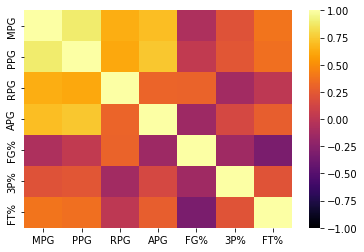

In [30]:
# Use Seaborn heatmap to visualize the correlations of each parameter with Contract Worth
sns.heatmap(corr_df, vmin = -1, vmax=1, cmap='inferno')

### Discover that FG%, 3P%, and FT% are more correlated to players contract worth than other parameters. Also proves, in reality, the more points a player can score for a team the better.

In [31]:
# Filter the last_5_yrs_1_rnd_draft_df dataframe to get top 5 picks (Pick number 1-5) data of each year (2017-2021) and save as group_a_df
group_a_df = last_5_yrs_1_rnd_draft_df.loc[last_5_yrs_1_rnd_draft_df['Pk'] <=5]
# Review group A dataframe
group_a_df.head()

,Pk,Tm,Player,College,MPG,PPG,RPG,APG,FG%,3P%,FT%,Pos,Rk,Contract Worth
DraftYr,,,,,,,,,,,,,,
2017,5,SAC,De'Aaron Fox,Kentucky,31.8,18.7,3.5,6.2,0.459,0.317,0.725,PG,5,22157109.0
2017,1,PHI,Markelle Fultz,Washington,25.6,10.9,3.3,4.6,0.447,0.265,0.695,SG,1,33727701.0
2017,4,PHO,Josh Jackson,Kansas,23.6,11.5,4.1,1.9,0.417,0.293,0.679,SF,4,24118800.0
2017,3,BOS,Jayson Tatum,Duke,33.3,20.4,6.6,2.9,0.453,0.380,0.842,SF,3,27118800.0
2017,2,LAL,Lonzo Ball,UCLA,32.5,11.9,5.7,6.2,0.400,0.364,0.578,PG,2,30184438.0


In [32]:
# Filter the last_5_yrs_1_rnd_draft_df dataframe to get middle 5 picks (Pick number 13-17) data of each year (2017-2021) and save as group_b_df
group_b_df = last_5_yrs_1_rnd_draft_df.loc[(last_5_yrs_1_rnd_draft_df['Pk'] >=13) & (last_5_yrs_1_rnd_draft_df['Pk'] <=17)]

In [33]:
# Filter the last_5_yrs_1_rnd_draft_df dataframe to get last 5 picks (Pick number 26-30) data of each year (2017-2021) and save as group_c_df
group_c_df = last_5_yrs_1_rnd_draft_df.loc[last_5_yrs_1_rnd_draft_df['Pk'] >=26]

In [34]:
# Select group A MPG data: rename the column and save it into a new dataframe
group_a_mpg = pd.DataFrame(group_a_df[['MPG']])
group_a_mpg.rename(columns = {'MPG': 'Group A MPG'}, inplace = True)
# Review group A MPG dataframe
group_a_mpg.head()

,Group A MPG
DraftYr,
2017,31.8
2017,25.6
2017,23.6
2017,33.3
2017,32.5


In [35]:
# Select group B MPG data: rename the column and save it into a new dataframe
group_b_mpg = pd.DataFrame(group_b_df[['MPG']])
group_b_mpg.rename(columns = {'MPG': 'Group B MPG'}, inplace = True)

# # Select group C MPG data: rename the column and save it into a new dataframe
group_c_mpg = pd.DataFrame(group_c_df[['MPG']])
group_c_mpg.rename(columns = {'MPG': 'Group C MPG'}, inplace = True)

In [36]:
# Concat 3 groups MPG dataframes and save it as all_goup_mpg_df
all_groups_mpg = [group_a_mpg, group_b_mpg, group_c_mpg]
all_group_mpg_df = pd.concat(all_groups_mpg, axis = 1)
# Review the dataframe
all_group_mpg_df.head()

,Group A MPG,Group B MPG,Group C MPG
DraftYr,,,
2017,31.8,33.7,25.8
2017,25.6,18.7,27.1
2017,23.6,13.5,30.3
2017,33.3,12.4,8.7
2017,32.5,28.0,12.2


In [37]:
# Get a summary of all groups MPG data
all_group_mpg_df.describe()

,Group A MPG,Group B MPG,Group C MPG
count,25.000000,25.000000,25.000000
mean,30.440000,19.876000,17.516000
std,3.564875,6.696969,7.851416
min,21.400000,9.500000,3.000000
25%,28.200000,14.200000,10.700000
50%,31.700000,19.200000,17.800000
75%,33.000000,24.500000,25.100000
max,35.400000,33.700000,30.300000


<AxesSubplot:>

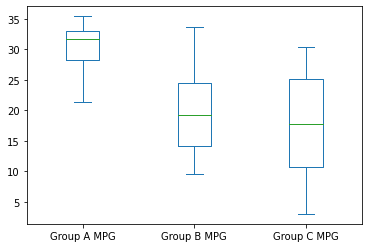

In [38]:
# Visualize all groups MPG data using box plot
all_group_mpg_df.plot.box()

In [39]:
# Select group A PPG data: rename the column and save it into a new dataframe
group_a_ppg = pd.DataFrame(group_a_df[['PPG']])
group_a_ppg.rename(columns = {'PPG': 'Group A PPG'}, inplace = True)
# Select group B PPG data: rename the column and save it into a new dataframe
group_b_ppg = pd.DataFrame(group_b_df[['PPG']])
group_b_ppg.rename(columns = {'PPG': 'Group B PPG'}, inplace = True)
# Select group C PPG data: rename the column and save it into a new dataframe
group_c_ppg = pd.DataFrame(group_c_df[['PPG']])
group_c_ppg.rename(columns = {'PPG': 'Group C PPG'}, inplace = True)

In [40]:
# Concat 3 groups PPG dataframes and save it as all_goup_ppg_df
all_groups_ppg = [group_a_ppg, group_b_ppg, group_c_ppg]
all_group_ppg_df = pd.concat(all_groups_ppg, axis = 1)
# Review the dataframe
all_group_ppg_df.head()

,Group A PPG,Group B PPG,Group C PPG
DraftYr,,,
2017,18.7,23.7,11.6
2017,10.9,6.5,9.5
2017,11.5,3.9,15.4
2017,20.4,4.4,2.3
2017,11.9,13.0,4.8


In [41]:
# Get a summary of all groups PPG data
all_group_ppg_df.describe()

,Group A PPG,Group B PPG,Group C PPG
count,25.000000,25.00000,25.000000
mean,16.096000,8.35600,7.328000
std,4.796047,5.02652,4.087126
min,9.100000,3.20000,1.000000
25%,12.600000,4.40000,3.800000
50%,15.700000,6.80000,6.800000
75%,18.700000,9.80000,9.800000
max,26.000000,23.70000,15.400000


<AxesSubplot:>

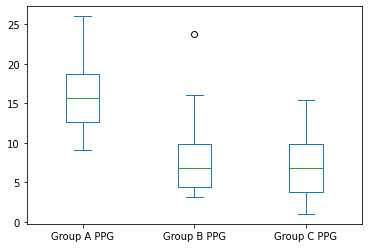

In [42]:
# Visualize all groups PPG data using box plot
all_group_ppg_df.plot.box()

In [43]:
# Select group A RPG data: rename the column and save it into a new dataframe
group_a_rpg = pd.DataFrame(group_a_df[['RPG']])
group_a_rpg.rename(columns = {'RPG': 'Group A RPG'}, inplace = True)
# Select group B RPG data: rename the column and save it into a new dataframe
group_b_rpg = pd.DataFrame(group_b_df[['RPG']])
group_b_rpg.rename(columns = {'RPG': 'Group B RPG'}, inplace = True)
# Select group C RPG data: rename the column and save it into a new dataframe
group_c_rpg = pd.DataFrame(group_c_df[['RPG']])
group_c_rpg.rename(columns = {'RPG': 'Group C RPG'}, inplace = True)

In [44]:
# Concat 3 groups RPG dataframes and save it as all_goup_rpg_df
all_groups_rpg = [group_a_rpg, group_b_rpg, group_c_rpg]
all_group_rpg_df = pd.concat(all_groups_rpg, axis = 1)
# Review the dataframe
all_group_rpg_df.head()

,Group A RPG,Group B RPG,Group C RPG
DraftYr,,,
2017,3.5,4.2,3.3
2017,3.3,2.5,5.8
2017,4.1,2.7,6.2
2017,6.6,3.1,2.9
2017,5.7,8.2,4.5


In [45]:
# Get a summary of all groups RPG data
all_group_rpg_df.describe()

,Group A RPG,Group B RPG,Group C RPG
count,25.000000,25.000000,25.000000
mean,5.388000,3.624000,3.264000
std,1.990042,1.833776,1.608799
min,2.500000,1.200000,1.000000
25%,3.900000,2.300000,2.000000
50%,5.100000,3.100000,2.700000
75%,6.600000,4.600000,4.300000
max,10.600000,8.200000,6.400000


<AxesSubplot:>

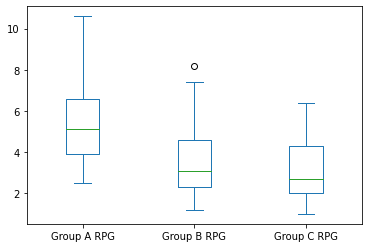

In [46]:
# Visualize all groups RPG data using box plot
all_group_rpg_df.plot.box()

In [47]:
# Select group A APG data: rename the column and save it into a new dataframe
group_a_apg = pd.DataFrame(group_a_df[['APG']])
group_a_apg.rename(columns = {'APG': 'Group A APG'}, inplace = True)
# Select group B APG data: rename the column and save it into a new dataframe
group_b_apg = pd.DataFrame(group_b_df[['APG']])
group_b_apg.rename(columns = {'APG': 'Group B APG'}, inplace = True)
# Select group C APG data: rename the column and save it into a new dataframe
group_c_apg = pd.DataFrame(group_c_df[['APG']])
group_c_apg.rename(columns = {'APG': 'Group C APG'}, inplace = True)

In [48]:
# Concat 3 groups APG dataframes and save it as all_goup_apg_df
all_groups_apg = [group_a_apg, group_b_apg, group_c_apg]
all_group_apg_df = pd.concat(all_groups_apg, axis = 1)
# Review the dataframe
all_group_apg_df.head()

,Group A APG,Group B APG,Group C APG
DraftYr,,,
2017,6.2,4.4,3.9
2017,4.6,1.1,2.0
2017,1.9,0.9,2.1
2017,2.9,0.7,0.7
2017,6.2,3.5,0.5


In [49]:
# Get a summary of all groups APG data
all_group_apg_df.describe()

,Group A APG,Group B APG,Group C APG
count,25.00000,25.000000,25.000000
mean,3.79200,1.724000,1.464000
std,2.38431,1.246756,1.089296
min,0.70000,0.300000,0.000000
25%,1.90000,0.900000,0.700000
50%,3.20000,1.200000,1.300000
75%,5.80000,2.300000,2.000000
max,8.90000,5.000000,4.500000


<AxesSubplot:>

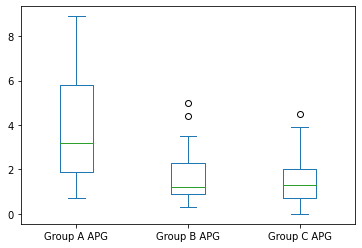

In [50]:
# Visualize all groups APG data using box plot
all_group_apg_df.plot.box()

In [51]:
# Select group A contract worth data: rename the column and save it into a new dataframe
group_a_contract = pd.DataFrame(group_a_df[['Contract Worth']])
group_a_contract.rename(columns = {'Contract Worth': 'Group A Contract Worth'}, inplace = True)
# Select group B contract worth data: rename the column and save it into a new dataframe
group_b_contract = pd.DataFrame(group_b_df[['Contract Worth']])
group_b_contract.rename(columns = {'Contract Worth': 'Group B Contract Worth'}, inplace = True)
# Select group C contract worth data: rename the column and save it into a new dataframe
group_c_contract = pd.DataFrame(group_c_df[['Contract Worth']])
group_c_contract.rename(columns = {'Contract Worth': 'Group C Contract Worth'}, inplace = True)

In [52]:
# Concat 3 groups contract worth dataframes and save it as all_goup_contract_df
all_groups_contract = [group_a_contract, group_b_contract, group_c_contract]
all_group_contract_df = pd.concat(all_groups_contract, axis = 1)
# Review the dataframe
all_group_contract_df.head()

,Group A Contract Worth,Group B Contract Worth,Group C Contract Worth
DraftYr,,,
2017,22157109.0,13092144.0,7625397.0
2017,33727701.0,12098915.0,7570779.0
2017,24118800.0,11497652.0,7727382.0
2017,27118800.0,10927154.0,7955043.0
2017,30184438.0,12587510.0,7681457.0


In [53]:
# Get a summary of all groups contract worth data
all_group_contract_df.describe()

,Group A Contract Worth,Group B Contract Worth,Group C Contract Worth
count,2.500000e+01,2.500000e+01,2.500000e+01
mean,3.398147e+07,1.487708e+07,9.457335e+06
std,6.343022e+06,1.853445e+06,1.065834e+06
min,2.215711e+07,1.092715e+07,7.570779e+06
25%,2.928044e+07,1.379106e+07,9.095405e+06
50%,3.306463e+07,1.509819e+07,1.001738e+07
75%,3.961984e+07,1.636453e+07,1.024349e+07
max,4.559882e+07,1.770436e+07,1.076312e+07


<AxesSubplot:>

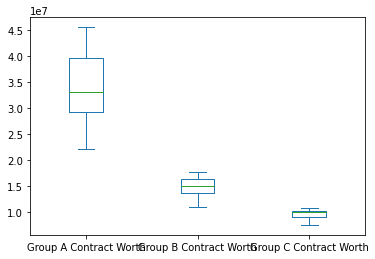

In [54]:
# Visualize all groups contract worth data using box plot
all_group_contract_df.plot.box()

In [55]:
# Calculate averages of each category for top 5 picks of each year and save to group_a_ave dataframe
group_a_ave=group_a_df.groupby('DraftYear').mean().sort_values('DraftYear')
# Review group_a_ave dataframe
group_a_ave

KeyError: 'DraftYear'

In [56]:
mean = group_a_ave[['MPG','PPG', 'RPG', 'APG','FG%', '3P%','FT%']].mean()
mean

NameError: name 'group_a_ave' is not defined

In [57]:
mean_df = mean.to_frame(name='mean')

NameError: name 'mean' is not defined

In [58]:
df = pd.DataFrame(dict(
    r=[30.44, 16.10, 5.39, 3.80, 0.46,0.32,0.75],
    theta=['MPG','PPG', 'RPG', 'APG','FG%', '3P%','FT%']))
fig = px.line_polar(mean_df, r='mean', theta='mean', line_close=True)
fig.show()

NameError: name 'px' is not defined

In [59]:
# Calculate averages of each category for middle 5 picks of each year and save to group_b_ave dataframe
group_b_ave=group_b_df.groupby('DraftYear').mean().sort_values('DraftYear')

KeyError: 'DraftYear'

In [60]:
# Calculate averages of each category for last 5 picks of each year and save to group_c_ave dataframe
group_c_ave=group_c_df.groupby('DraftYear').mean().sort_values('DraftYear')

KeyError: 'DraftYear'

In [61]:
categories = ['MPG','PPG', 'RPG', 'APG','FG%', '3P%','FT%']
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
    r = [30.44, 16.10, 5.39, 3.80,0.46,0.32,0.75],
    theta = categories,
    fill='toself',
    name= 'Group A'
))

fig.add_trace(go.Scatterpolar(
    r = [19.88,8.36,3.62,1.72,0.42,0.31,0.76],
    theta = categories,
    fill='toself',
    name= 'Group B'
))

fig.add_trace(go.Scatterpolar(
    r = [17.52,7.33,3.26,1.46,0.48,0.30,0.75],
    theta = categories,
    fill='toself',
    name= 'Group C'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0,35]
        )),
    showlegend=True,
    width = 500,
    height = 500
)
    
fig.show()

NameError: name 'go' is not defined

In [62]:
pg_categories = ['MPG','PPG', 'RPG', 'APG']
pg_fig = go.Figure()
pg_fig.add_trace(go.Scatterpolar(
    r = [30.44, 16.10, 5.39, 3.80],
    theta = pg_categories,
    fill='toself',
    name= 'Group A'
))

pg_fig.add_trace(go.Scatterpolar(
    r = [19.88,8.36,3.62,1.72],
    theta = pg_categories,
    fill='toself',
    name= 'Group B'
))

pg_fig.add_trace(go.Scatterpolar(
    r = [17.52,7.33,3.26,1.46],
    theta = pg_categories,
    fill='toself',
    name= 'Group C'
))

pg_fig.update_layout(
    polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0,35]
        )),
    showlegend=True,
    width = 500,
    height = 500
)
    
pg_fig.show()

NameError: name 'go' is not defined

In [63]:
shooting_categories = ['FG%', '3P%','FT%']
shooting_fig = go.Figure()
shooting_fig.add_trace(go.Scatterpolar(
    r = [0.46,0.32,0.75],
    theta = shooting_categories,
    fill='toself',
    name= 'Group A'
))

shooting_fig.add_trace(go.Scatterpolar(
    r = [0.42,0.31,0.76],
    theta = shooting_categories,
    fill='toself',
    name= 'Group B'
))

shooting_fig.add_trace(go.Scatterpolar(
    r = [0.48,0.30,0.75],
    theta = shooting_categories,
    fill='toself',
    name= 'Group C'
))

shooting_fig.update_layout(
    polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0,1]
        )),
    showlegend=True,
    width = 500,
    height = 500
)
    
shooting_fig.show()


NameError: name 'go' is not defined

In [64]:
# Use hvplot to visualize group A's minutes per game played 2017-2021
group_a_mpg_plot = group_a_ave['MPG'].hvplot(
    title='Average 1st Round Picks Minutes Per Game Played 2017-2021',
    x='DraftYear',
    y='MPG',
    xlabel='Draft Year',
    ylabel='Munites Per Game',
    label='Group-A'
)

NameError: name 'group_a_ave' is not defined

In [65]:
# Use hvplot to visualize group B's minutes per game played 2017-2021
group_b_mpg_plot = group_b_ave['MPG'].hvplot(
    title='Average 1st Round Picks Minutes Per Game Played 2017-2021',
    x='DraftYear',
    y='MPG',
    xlabel='Draft Year',
    ylabel='Munites Per Game',
    label='Group-B'
)

NameError: name 'group_b_ave' is not defined

In [66]:
# Use hvplot to visualize group C's minutes per game played 2017-2021
group_c_mpg_plot = group_c_ave['MPG'].hvplot(
    title='Average 1st Round Picks Minutes Per Game Played 2017-2021',
    x='DraftYear',
    y='MPG',
    xlabel='Draft Year',
    ylabel='Munites Per Game',
    label='Group-C'
)

NameError: name 'group_c_ave' is not defined

In [67]:
# Overlay all groups minutes per game played 2017-2021
all_groups_mpg_plot = group_a_mpg_plot *group_b_mpg_plot * group_c_mpg_plot 
all_groups_mpg_plot

NameError: name 'group_a_mpg_plot' is not defined

In [68]:
# Use hvplot to visualize group A's points per game 2017-2021
group_a_ppg_plot = group_a_ave['PPG'].hvplot(
    title='Average 1st Round Picks Points Per Game 2017-2021',
    x='DraftYear',
    y='PPG',
    xlabel='Draft Year',
    ylabel='Points Per Game',
    label='Group-A'
)

NameError: name 'group_a_ave' is not defined

In [69]:
# Use hvplot to visualize group B's points per game 2017-2021
group_b_ppg_plot = group_b_ave['PPG'].hvplot(
    title='Average 1st Round Picks Points Per Game 2017-2021',
    x='DraftYear',
    y='PPG',
    xlabel='Draft Year',
    ylabel='Points Per Game',
    label='Group-B'
)

NameError: name 'group_b_ave' is not defined

In [70]:
# Use hvplot to visualize group C's points per game 2017-2021
group_c_ppg_plot = group_c_ave['PPG'].hvplot(
    title='Average 1st Round Picks Points Per Game 2017-2021',
    x='DraftYear',
    y='PPG',
    xlabel='Draft Year',
    ylabel='Points Per Game',
    label='Group-C'
)

NameError: name 'group_c_ave' is not defined

In [71]:
# Overlay all groups points per game 2017-2021
all_group_ppg_plot = group_a_ppg_plot * group_b_ppg_plot * group_c_ppg_plot
all_group_ppg_plot

NameError: name 'group_a_ppg_plot' is not defined

In [72]:
# Use hvplot to visualize group A's rebounds per game 2017-2021
group_a_rpg_plot = group_a_ave['RPG'].hvplot(
    title='Average 1st Round Picks Rebounds Per Game 2017-2021',
    x='DraftYear',
    y='RPG',
    xlabel='Draft Year',
    ylabel='Rebounds Per Game',
    label='Group-A'
)

NameError: name 'group_a_ave' is not defined

In [73]:
# Use hvplot to visualize group B's rebounds per game 2017-2021
group_b_rpg_plot = group_b_ave['RPG'].hvplot(
    title='Average 1st Round Picks Rebounds Per Game 2017-2021',
    x='DraftYear',
    y='RPG',
    xlabel='Draft Year',
    ylabel='Rebounds Per Game',
    label='Group-B'
)

NameError: name 'group_b_ave' is not defined

In [74]:
# Use hvplot to visualize group C's rebounds per game 2017-2021
group_c_rpg_plot = group_c_ave['RPG'].hvplot(
    title='Average 1st Round Picks Rebounds Per Game 2017-2021',
    x='DraftYear',
    y='RPG',
    xlabel='Draft Year',
    ylabel='Rebounds Per Game',
    label='Group-C'
)

NameError: name 'group_c_ave' is not defined

In [75]:
# Overlay all groups rebounds per game 2017-2021
group_a_rpg_plot * group_b_rpg_plot * group_c_rpg_plot

NameError: name 'group_a_rpg_plot' is not defined

In [76]:
# Use hvplot to visualize group A's assists per game 2017-2021
group_a_apg_plot = group_a_ave['APG'].hvplot(
    title='Average 1st Round Picks Assists Per Game 2017-2021',
    x='DraftYear',
    y='APG',
    xlabel='Draft Year',
    ylabel='Assists Per Game',
    label='Group-A'
)

NameError: name 'group_a_ave' is not defined

In [77]:
# Use hvplot to visualize group B's assists per game 2017-2021
group_b_apg_plot = group_b_ave['APG'].hvplot(
    title='Average 1st Round Picks Assists Per Game 2017-2021',
    x='DraftYear',
    y='APG',
    xlabel='Draft Year',
    ylabel='Assists Per Game',
    label='Group-B'
)

NameError: name 'group_b_ave' is not defined

In [78]:
# Use hvplot to visualize group C's assists per game 2017-2021
group_c_apg_plot = group_c_ave['APG'].hvplot(
    title='Average 1st Round Picks Assists Per Game 2017-2021',
    x='DraftYear',
    y='APG',
    xlabel='Draft Year',
    ylabel='Assists Per Game',
    label='Group-C'
)

NameError: name 'group_c_ave' is not defined

In [79]:
# Overlay all groups assists per game 2017-2021
group_a_apg_plot * group_b_apg_plot * group_c_apg_plot

NameError: name 'group_a_apg_plot' is not defined

In [80]:
# Use hvplot to visualize group A's field goal percentage 2017-2021
group_a_fg_plot = group_a_ave['FG%'].hvplot(
    title='Average 1st Round Picks Field Goal Percentage 2017-2021',
    x='DraftYear',
    y='FG%',
    xlabel='Draft Year',
    ylabel='Field Goal Percentage',
    label='Group-A'
)

NameError: name 'group_a_ave' is not defined

In [81]:
# Use hvplot to visualize group B's field goal percentage 2017-2021
group_b_fg_plot = group_b_ave['FG%'].hvplot(
    title='Average 1st Round Picks Field Goal Percentage 2017-2021',
    x='DraftYear',
    y='FG%',
    xlabel='Draft Year',
    ylabel='Field Goal Percentage',
    label='Group-B'
)

NameError: name 'group_b_ave' is not defined

In [82]:
# Use hvplot to visualize group C's field goal percentage 2017-2021
group_c_fg_plot = group_c_ave['FG%'].hvplot(
    title='Average 1st Round Picks Field Goal Percentage 2017-2021',
    x='DraftYear',
    y='FG%',
    xlabel='Draft Year',
    ylabel='Field Goal Percentage',
    label='Group-C'
)

NameError: name 'group_c_ave' is not defined

In [83]:
# Overlay all groups field goal percentage 2017-2021
group_a_fg_plot*group_b_fg_plot*group_c_fg_plot

NameError: name 'group_a_fg_plot' is not defined

In [84]:
# Use hvplot to visualize group A's 3-pointer percentage 2017-2021
group_a_3p_plot = group_a_ave['3P%'].hvplot(
    title='Average 1st Round Picks 3-Pointer Percentage 2017-2021',
    x='DraftYear',
    y='3P%',
    xlabel='Draft Year',
    ylabel='3_Pointer Percentage',
    label='Group-A'
)

NameError: name 'group_a_ave' is not defined

In [85]:
# Use hvplot to visualize group B's 3-pointer percentage 2017-2021
group_b_3p_plot = group_b_ave['3P%'].hvplot(
    title='Average 1st Round Picks 3-Pointer Percentage 2017-2021',
    x='DraftYear',
    y='3P%',
    xlabel='Draft Year',
    ylabel='3_Pointer Percentage',
    label='Group-B'
)

NameError: name 'group_b_ave' is not defined

In [86]:
# Use hvplot to visualize group C's 3-pointer percentage 2017-2021
group_c_3p_plot = group_c_ave['3P%'].hvplot(
    title='Average 1st Round Picks 3-Pointer Percentage 2017-2021',
    x='DraftYear',
    y='3P%',
    xlabel='Draft Year',
    ylabel='3_Pointer Percentage',
    label='Group-C'
)

NameError: name 'group_c_ave' is not defined

In [87]:
# Overlay all groups 3-pinter percentage 2017-2021
group_a_3p_plot*group_b_3p_plot*group_c_3p_plot

NameError: name 'group_a_3p_plot' is not defined

In [88]:
# Use hvplot to visualize group A's free throws percentage 2017-2021
group_a_ft_plot = group_a_ave['FT%'].hvplot(
    title='Average 1st Round Picks Free Throws Percentage 2017-2021',
    x='DraftYear',
    y='FT%',
    xlabel='Draft Year',
    ylabel='Free Throws Percentage',
    label='Group-A'
)

NameError: name 'group_a_ave' is not defined

In [89]:
# Use hvplot to visualize group B's free throws percentage 2017-2021
group_b_ft_plot = group_b_ave['FT%'].hvplot(
    title='Average 1st Round Picks Free Throws Percentage 2017-2021',
    x='DraftYear',
    y='FT%',
    xlabel='Draft Year',
    ylabel='Free Throws Percentage',
    label='Group-B'
)

NameError: name 'group_b_ave' is not defined

In [90]:
# Use hvplot to visualize group C's free throws percentage 2017-2021
group_c_ft_plot = group_c_ave['FT%'].hvplot(
    title='Average 1st Round Picks Free Throws Percentage 2017-2021',
    x='DraftYear',
    y='FT%',
    xlabel='Draft Year',
    ylabel='Free Throws Percentage',
    label='Group-C'
)

NameError: name 'group_c_ave' is not defined

In [91]:
# Overlay all groups free throws percentage 2017-2021
group_a_ft_plot*group_b_ft_plot*group_c_ft_plot

NameError: name 'group_a_ft_plot' is not defined

### When looking at MPG, PPG, RPG, and APG graphs, Group A has the best numbers followed by Group B and C, which implies an easy trend to follow; while when it comes to FG%, 3P%, and FT%, Group B and C seems have better numbers, which is hard to discover any trend.

### Kentucky, Duke, and UNC have highest number of athletes got drafted. However, picks came from these schools are ranking lower each year in the draft